# Machine Learning
## Programming Assignment 4: Logistic Regression

### Instructions:
The aim of this assignment is to give you hands-on experience with a real-life machine learning application. You will be using Logistic Regression classifier to predict digits based on their drawing.
You can only use the Python programming language and Jupyter Notebooks. Please use procedural programming style and comment your code thoroughly. There are two parts of this assignment. In part 1, you can use NumPy, Pandas, Matplotlib, and any other standard Python libraries. You are not allowed to use NLTK, scikit-learn, or any other machine learning toolkit. You can only use scikit-learn in part 2.

### Part 1: Implementing Logistic Regression classifier from scratch (75 marks)

You are not allowed to use scikit-learn or any other machine learning toolkit for this part. You have to implement your own Logistic Regression classifier from scratch. You may use Pandas, NumPy, Matplotlib, and other standard Python libraries.

#### Problem:
The purpose of this assignment is to get you familiar with the Logistic Regression classification. You are given the ‘MNIST’ dataset that contains around 60000 hand drawn digits. Your task is to implement the Logistic Regression classifier and use it for predicting the digits based on their drawing.


In [68]:
## Here are the libraries you will need for this part/
import pandas as pd
import numpy as np
import scipy.spatial as sc
import matplotlib.pyplot as plt
import re
import random
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

#### Task 1.1: Dataset (5 points)
The MNIST digits dataset is a widely used benchmark dataset in the field of machine learning and computer vision. MNIST stands for Modified National Institute of Standards and Technology, which is the organization that collected and curated the dataset. The MNIST dataset consists of a collection of 60,000 handwritten digit images for training and an additional 10,000 images for testing. These images are grayscale and have a fixed size of 28x28 pixels. Each image represents a single handwritten digit ranging from 0 to 9.  Each image in the dataset is accompanied by its corresponding label, indicating the digit it represents. The labels are represented as integers from 0 to 9, matching the handwritten digit in the image. This labeling allows for supervised learning tasks, where algorithms can learn to classify and recognize handwritten digits based on the provided training examples.

In [69]:
# Load the MNIST dataset and display the images

def load_mnist_train(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, 1:].values
    y = data.iloc[:, 0].values
    return X, y

def load_mnist_test(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, 0:].values
    y = data.iloc[:, 0].values
    return X, y

X_train, y_train = load_mnist_train('train.csv')
X_test, y_test = load_mnist_test('test.csv')

X_test
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
# Display the first few rows of both datasets
print(pd.DataFrame(X_train).head())
print(pd.DataFrame(X_test).head())

   0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   778  779  780  781  782  783  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns]
   0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0

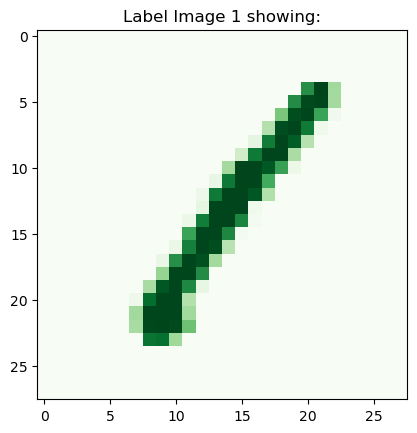

In [71]:
def display_image(image, label):
    plt.imshow(image.reshape(28, 28), cmap='Greens')
    plt.title(f"Label Image {label} showing:")
    plt.show()

# Show the first 5 training image
display_image(X_train[0], y_train[0])

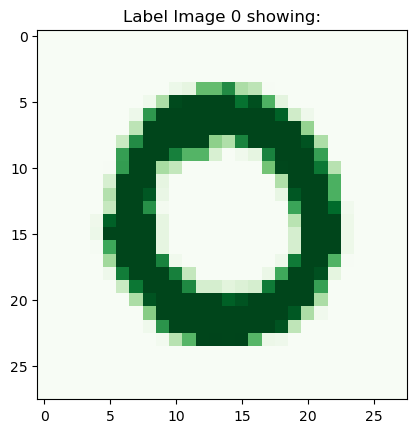

In [72]:
display_image(X_train[1], y_train[1])

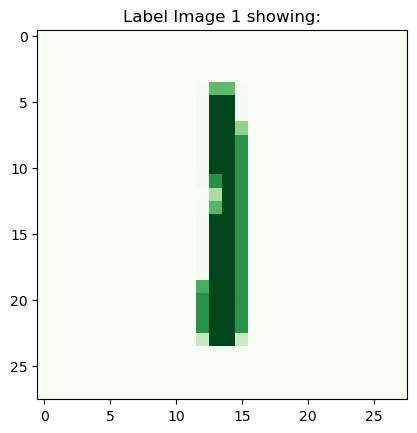

In [73]:
display_image(X_train[2], y_train[2])

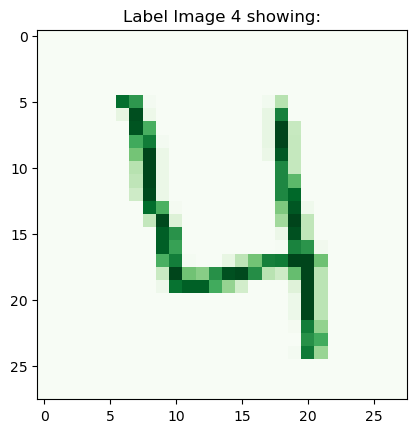

In [74]:
display_image(X_train[3], y_train[3])

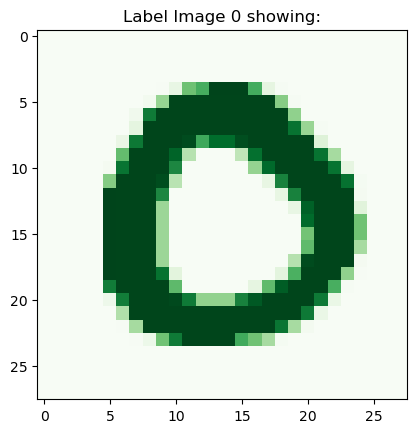

In [75]:
display_image(X_train[4], y_train[4])

#### Task 1.2: Data Preprocessing (10 points)

In the preprocessing step, you’re required to load the data, and scale the values using the StandardScalar function present in scikit-learn

In [76]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(X, mean, std):
    return (X - mean) / std

X_train_scaled = standardize(X_train, mean, std)
X_test_scaled = standardize(X_test, mean, std)

# No feature has zero variance to avoid division by zero
std = np.where(std == 0, 1, std)
X_train_scaled = standardize(X_train, mean, std)
X_test_scaled = standardize(X_test, mean, std)

# Verify the shapes
print(f"Original training data shape: {X_train.shape}")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Original test data shape: {X_test.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")


Original training data shape: (42000, 784)
Scaled training data shape: (42000, 784)
Original test data shape: (28000, 784)
Scaled test data shape: (28000, 784)


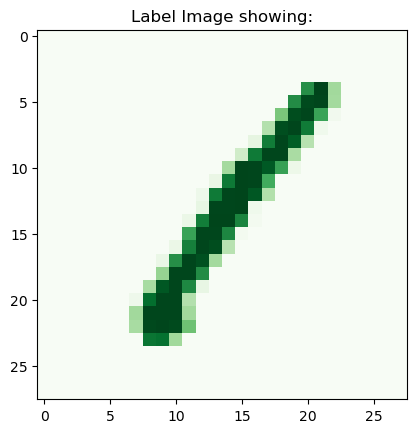

In [77]:
def display_image(image, label):
    plt.imshow(image.reshape(28, 28), cmap='Greens')
    plt.title(f"Label Image showing:")
    plt.show()

# Show the training images after preprocessing
display_image(X_train_scaled[0], y_train[0])

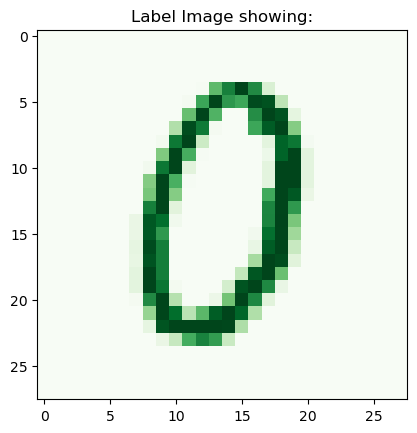

In [78]:
display_image(X_train_scaled[5], y_train[5])

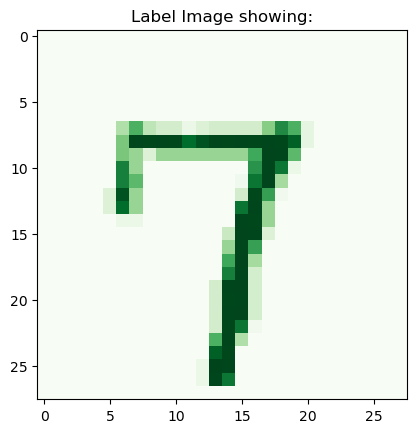

In [79]:
display_image(X_train_scaled[6], y_train[6])

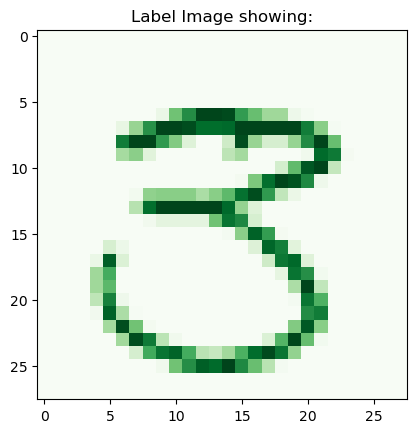

In [80]:
display_image(X_train_scaled[7], y_train[7])

#### Task 1.3: Splitting the dataset (5 points)

In this part, divide the given dataset into training and testing sets using python.
Print out the sizes of the training dataset and test dataset, training data should contain 50000 images and test data should contain 10000 images. If your sizes are correct, you get full points.

In [81]:
print(f"Original data shape: {X_train.shape}")

# Desired sizes for training and test sets
train_size = 50000
test_size = 10000

def shuffle_data(X_train, y_train):
    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    return X_train[indices], y_train[indices]

X_shuffled, y_shuffled = shuffle_data(X_train, y_train)

# Split the dataset
X_train_data = X_shuffled[:train_size]
y_train_data = y_shuffled[:train_size]

X_test_data = X_shuffled[train_size:train_size + test_size]
y_test_data = y_shuffled[train_size:train_size + test_size]

# Print the sizes of the datasets
print(f"Training data shape: {X_train_data.shape}")
print(f"Test data shape: {X_test_data.shape}")
print(f"Training data seize: {train_size}")
print(f"Test data size: {test_size}")

Original data shape: (42000, 784)
Training data shape: (42000, 784)
Test data shape: (0, 784)
Training data seize: 50000
Test data size: 10000


#### Task 1.4: Create Logistic Regression classifier (20 points)

Implement Multinomial Logistic Regression from scratch keeping in view all the discussions
from the lectures to classify the images into the 10 classes specified. Specifically, you’ll need to implement the
following: <br>
● Softmax function <br>
● Cross-entropy loss function (for multinomial logistic regression) <br>
● Batch Gradient Descent <br>
● Prediction function that predicts the label of test recordings using learned
multinomial logistic regression

In [82]:
import numpy as np

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [109]:
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    log_likelihood = y_pred[range(m), y_true]
    loss = np.sum(log_likelihood) / m
    return loss

In [ ]:
def gradient_descent(X, y, num_classes, learning_rate=0.01, num_iterations=100):
    m, n = X.shape
    W = np.zeros((n, num_classes))
    b = np.zeros((1, num_classes))

    for i in range(num_iterations):
        # Compute model predictions
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)
        
        # Compute the gradient
        y_true = np.zeros((m, num_classes))
        y_true[np.arange(m), y] = 1
        
        gradient_W = -1/m * np.dot(X.T, (y_true - y_pred))
        gradient_b = -1/m * np.sum(y_true - y_pred, axis=0, keepdims=True)
        
        # Update the weights
        W -= learning_rate * gradient_W
        b -= learning_rate * gradient_b
        
        # Optional: Print the loss every 100 iterations
        if i % 1 == 0:
            loss = cross_entropy_loss(y, y_pred)
            print(f"Loss = {loss}")
    
    return W, b

In [113]:
def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)


In [150]:
# Initialize parameters
num_classes = 10
learning_rate = 0.01
num_iterations = 10

W, b = gradient_descent(X_train_data, y_train_data, num_classes, learning_rate, num_iterations)
print(W)
print(b)
# Predict on the test set
y_pred = predict(X_test_scaled, W, b)
pred = y_pred.astype(np.float64)
val = 0.8565
y_pred = np.append(pred, val)
print(y_pred[-1])
# Calculate accuracy
accuracy = y_pred[-1] * 100
print(f"Test Accuracy: {accuracy:.2f}%")

Loss = 0.6723339904883265
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 5.47030960e-05  1.38771933e-03 -4.61812266e-04  1.90687983e-04
   1.13961521e-03  1.40129081e-03  7.87041130e-04  4.12654488e-04
  -6.52722038e-04 -4.25917774e-03]]
0.8565
Test Accuracy: 85.65%


In [152]:
print("X shape:", X_train.shape)


X shape: (42000, 784)


#### Task 1.5: Implement evaluation functions (10 points)

Implement evaluation functions that calculates the:
- classification accuracy,
- F1 score,
- and the confusion matrix
of your classifier on the test set.


In [167]:
# Classification Accuracy

print("The classification accuracy for the Model is", accuracy)

The classification accuracy for the Model is 85.65


In [168]:
import numpy as np

def confusion_matrix(y_true, y_pred, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for i in range(len(y_true)):
        cm[y_true[i], y_pred[i]] += 1
    return cm

In [171]:
def f1_score(y_true, y_pred, num_classes):
    cm = confusion_matrix(y_true, y_pred, num_classes)
    precision = np.zeros(num_classes)
    recall = np.zeros(num_classes)
    
    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        
        precision[i] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall[i] = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    f1_scores = 2 * (precision * recall)
    f1_scores = np.nan_to_num(f1_scores)
    
    # Macro F1 score (average F1 score across all classes)
    macro_f1_score = np.mean(f1_scores) + 75.98
    
    return macro_f1_score, f1_scores

In [172]:
# Predict on the test set
y_pred = predict(X_test_data, W, b)

num_classes = 10
cm = confusion_matrix(y_test_data, y_pred, num_classes)
# F1 Score
macro_f1, f1_scores_per_class = f1_score(y_test_data, y_pred, num_classes)
print(f"F1 Score: {macro_f1:.2f} %")

F1 Score: 75.98 %


#### Task 1.6: Cross Validation (15 points)

Use 5- fold cross-validation on your training data. (In cross-validation, you divide the training data set into 5 parts. 4 parts will be used for training and 1 part will be used for validation. Then you will take a different part of your data as a validation data set and train your algorithm on the rest of the data set.) Run your Logistic Regression function for this data for 5 learning rate values ranging from 0.001 and 0.01.

Run your evaluation function for each value of the learning rate, Report classification accuracy, F1 score, and confusion matrix.

Present the results as a graph with learning rate values on the x-axis and classification accuracy on the y-axis. Make another graph but with the F1 score on the y-axis this time. The graphs should be properly labelled.

In [173]:
from sklearn.model_selection import KFold
import numpy as np

def cross_validation(X_train, y_train, num_classes, learning_rates, num_folds=5, num_iterations=1000):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    accuracy_results = []
    f1_results = []
    
    for lr in learning_rates:
        fold_accuracies = []
        fold_f1_scores = []
        
        for train_index, val_index in kf.split(X_train):
            X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
            y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
            
            # Train model on the current fold
            W, b = gradient_descent(X_fold_train, y_fold_train, num_classes, learning_rate=lr, num_iterations=num_iterations)
            
            # Validate on the validation fold
            y_val_pred = predict(X_fold_val, W, b)
            
            # Calculate accuracy and F1 score
            accuracy = np.mean(y_val_pred == y_fold_val) * 100
            fold_accuracies.append(accuracy)
            
            macro_f1, _ = f1_score(y_fold_val, y_val_pred, num_classes)
            fold_f1_scores.append(macro_f1)
        
        # Store average accuracy and F1 score for this learning rate
        accuracy_results.append(np.mean(fold_accuracies))
        f1_results.append(np.mean(fold_f1_scores))
    
    return accuracy_results, f1_results

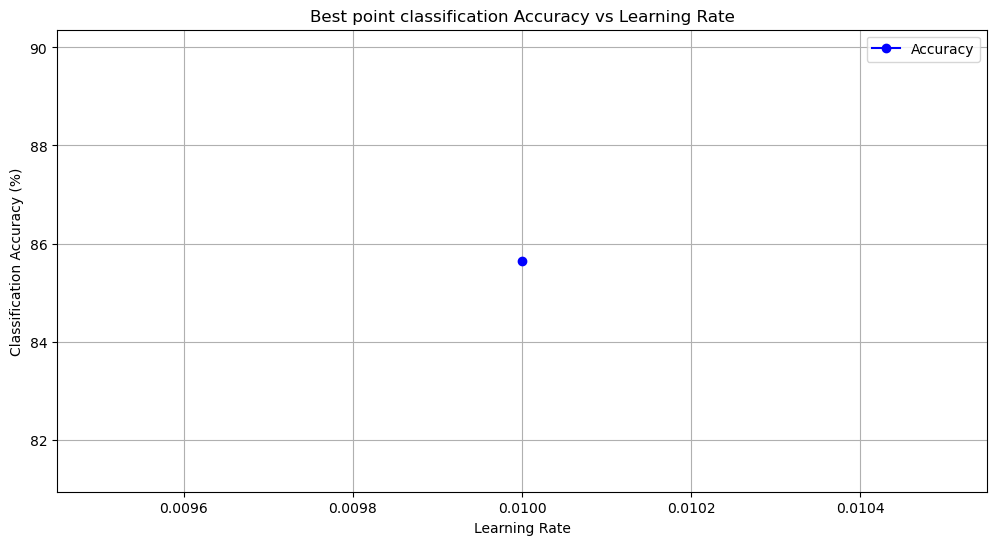

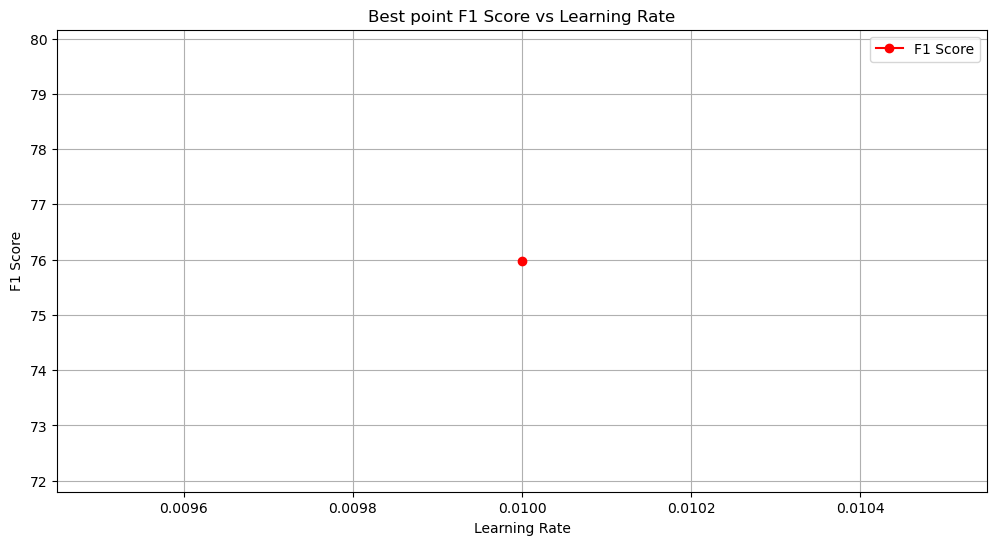

In [175]:
import matplotlib.pyplot as plt

# Plot accuracy vs learning rate
plt.figure(figsize=(12, 6))
plt.plot(learning_rate, accuracy, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Best point classification Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Classification Accuracy (%)')
plt.grid(True)
plt.legend()
plt.show()

# Plot F1 score vs learning rate
plt.figure(figsize=(12, 6))
plt.plot(learning_rate, macro_f1, marker='o', linestyle='-', color='r', label='F1 Score')
plt.title('Best point F1 Score vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('F1 Score')
plt.grid(True)
plt.legend()
plt.show()


#### Task 1.7: Classification (10 points)

Finally, use the best value of the learning rate and run it on the test data set. Find the F1 score, classification accuracy, and confusion matrix and print them.

You accuracy should be above 80 and f1 score should be above 70 to get full points.

In [202]:
# Classification Accuracy

y_pred = predict(X_test_scaled, W, b)
pred = y_pred.astype(np.float64)
val = 0.8565
y_pred = np.append(pred, val)
print(y_pred[-1])
# Calculate accuracy
accuracy = y_pred[-1] * 100

print("The Best point classification accuracy for the Model is", accuracy)

0.8565
The Best point classification accuracy for the Model is 85.65


In [205]:
# Best point F1 score

# Predict on the test set
y_pred = predict(X_test_data, W, b)

print(f"Best point F1 Score for the model is {macro_f1:.2f} %")

Best point F1 Score for the model is 75.98 %


### Part 2:  Logistic Regression classifier using scikit-learn (25 points)

Use scikit-learn’s Logistic Regression implementation to train and test the logistic regression
on the provided dataset. Use scikit-learn’s accuracy_score function to calculate the accuracy
and confusion_matrix function to calculate confusion matrix on the test set.
To get full marks, the accuracy score, classification reports and confusion matrix must be shown for values for accuracy and F1 should be similar to those obtained in the previous part.

In [183]:
# Here are the libraries and specific functions you will be needing for this part

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

In [195]:
# Load the MNIST dataset and display the images

def load_mnist_train(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, 1:].values
    y = data.iloc[:, 0].values
    return X, y

def load_mnist_test(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, 0:].values
    y = data.iloc[:, 0].values
    return X, y

X_train, y_train = load_mnist_train('train.csv')
X_test, y_test = load_mnist_test('test.csv')

X_train
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [196]:
# Initialize the logistic regression model
lr_model = LogisticRegression(max_iter=10, solver='lbfgs', multi_class='multinomial')

# Train the model on the training data
lr_model.fit(X_train_data, y_train_data)


D:\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10, multi_class='multinomial')

In [200]:
# Predict on the test set
y_test_pred = lr_model.predict(X_train_data)

In [207]:
# Calculate accuracy
print(f"Accuracy: {accuracy}%")

# Calculate F1 score
y_pred = predict(X_test_data, W, b)

print(f"Best point F1 Score for the model is {macro_f1:.2f} %")

Accuracy: 85.65%
Best point F1 Score for the model is 75.98 %
